# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dwi Cahya Nur Faizi
- **Email:** cahyafaizi@gmail.com
- **ID Dicoding:** daisetsu

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa saja kategori produk yang menjadi top-selling?
- Pertanyaan 2: Negara bagian mana saja yang menjadi top-selling?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geobr import read_state

pd.set_option("display.float_format", "{:.2f}".format)

## Data Wrangling

### Gathering Data

In [2]:
customer_db = pd.read_csv("data/customers_dataset.csv")
geolocation_db = pd.read_csv("data/geolocation_dataset.csv")
order_items_db = pd.read_csv("data/order_items_dataset.csv")
order_payments_db = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_db = pd.read_csv("data/order_reviews_dataset.csv")
orders_db = pd.read_csv("data/orders_dataset.csv")
products_translation_db = pd.read_csv("data/product_category_name_translation.csv")
products_db = pd.read_csv("data/products_dataset.csv")
sellers_db = pd.read_csv("data/sellers_dataset.csv")

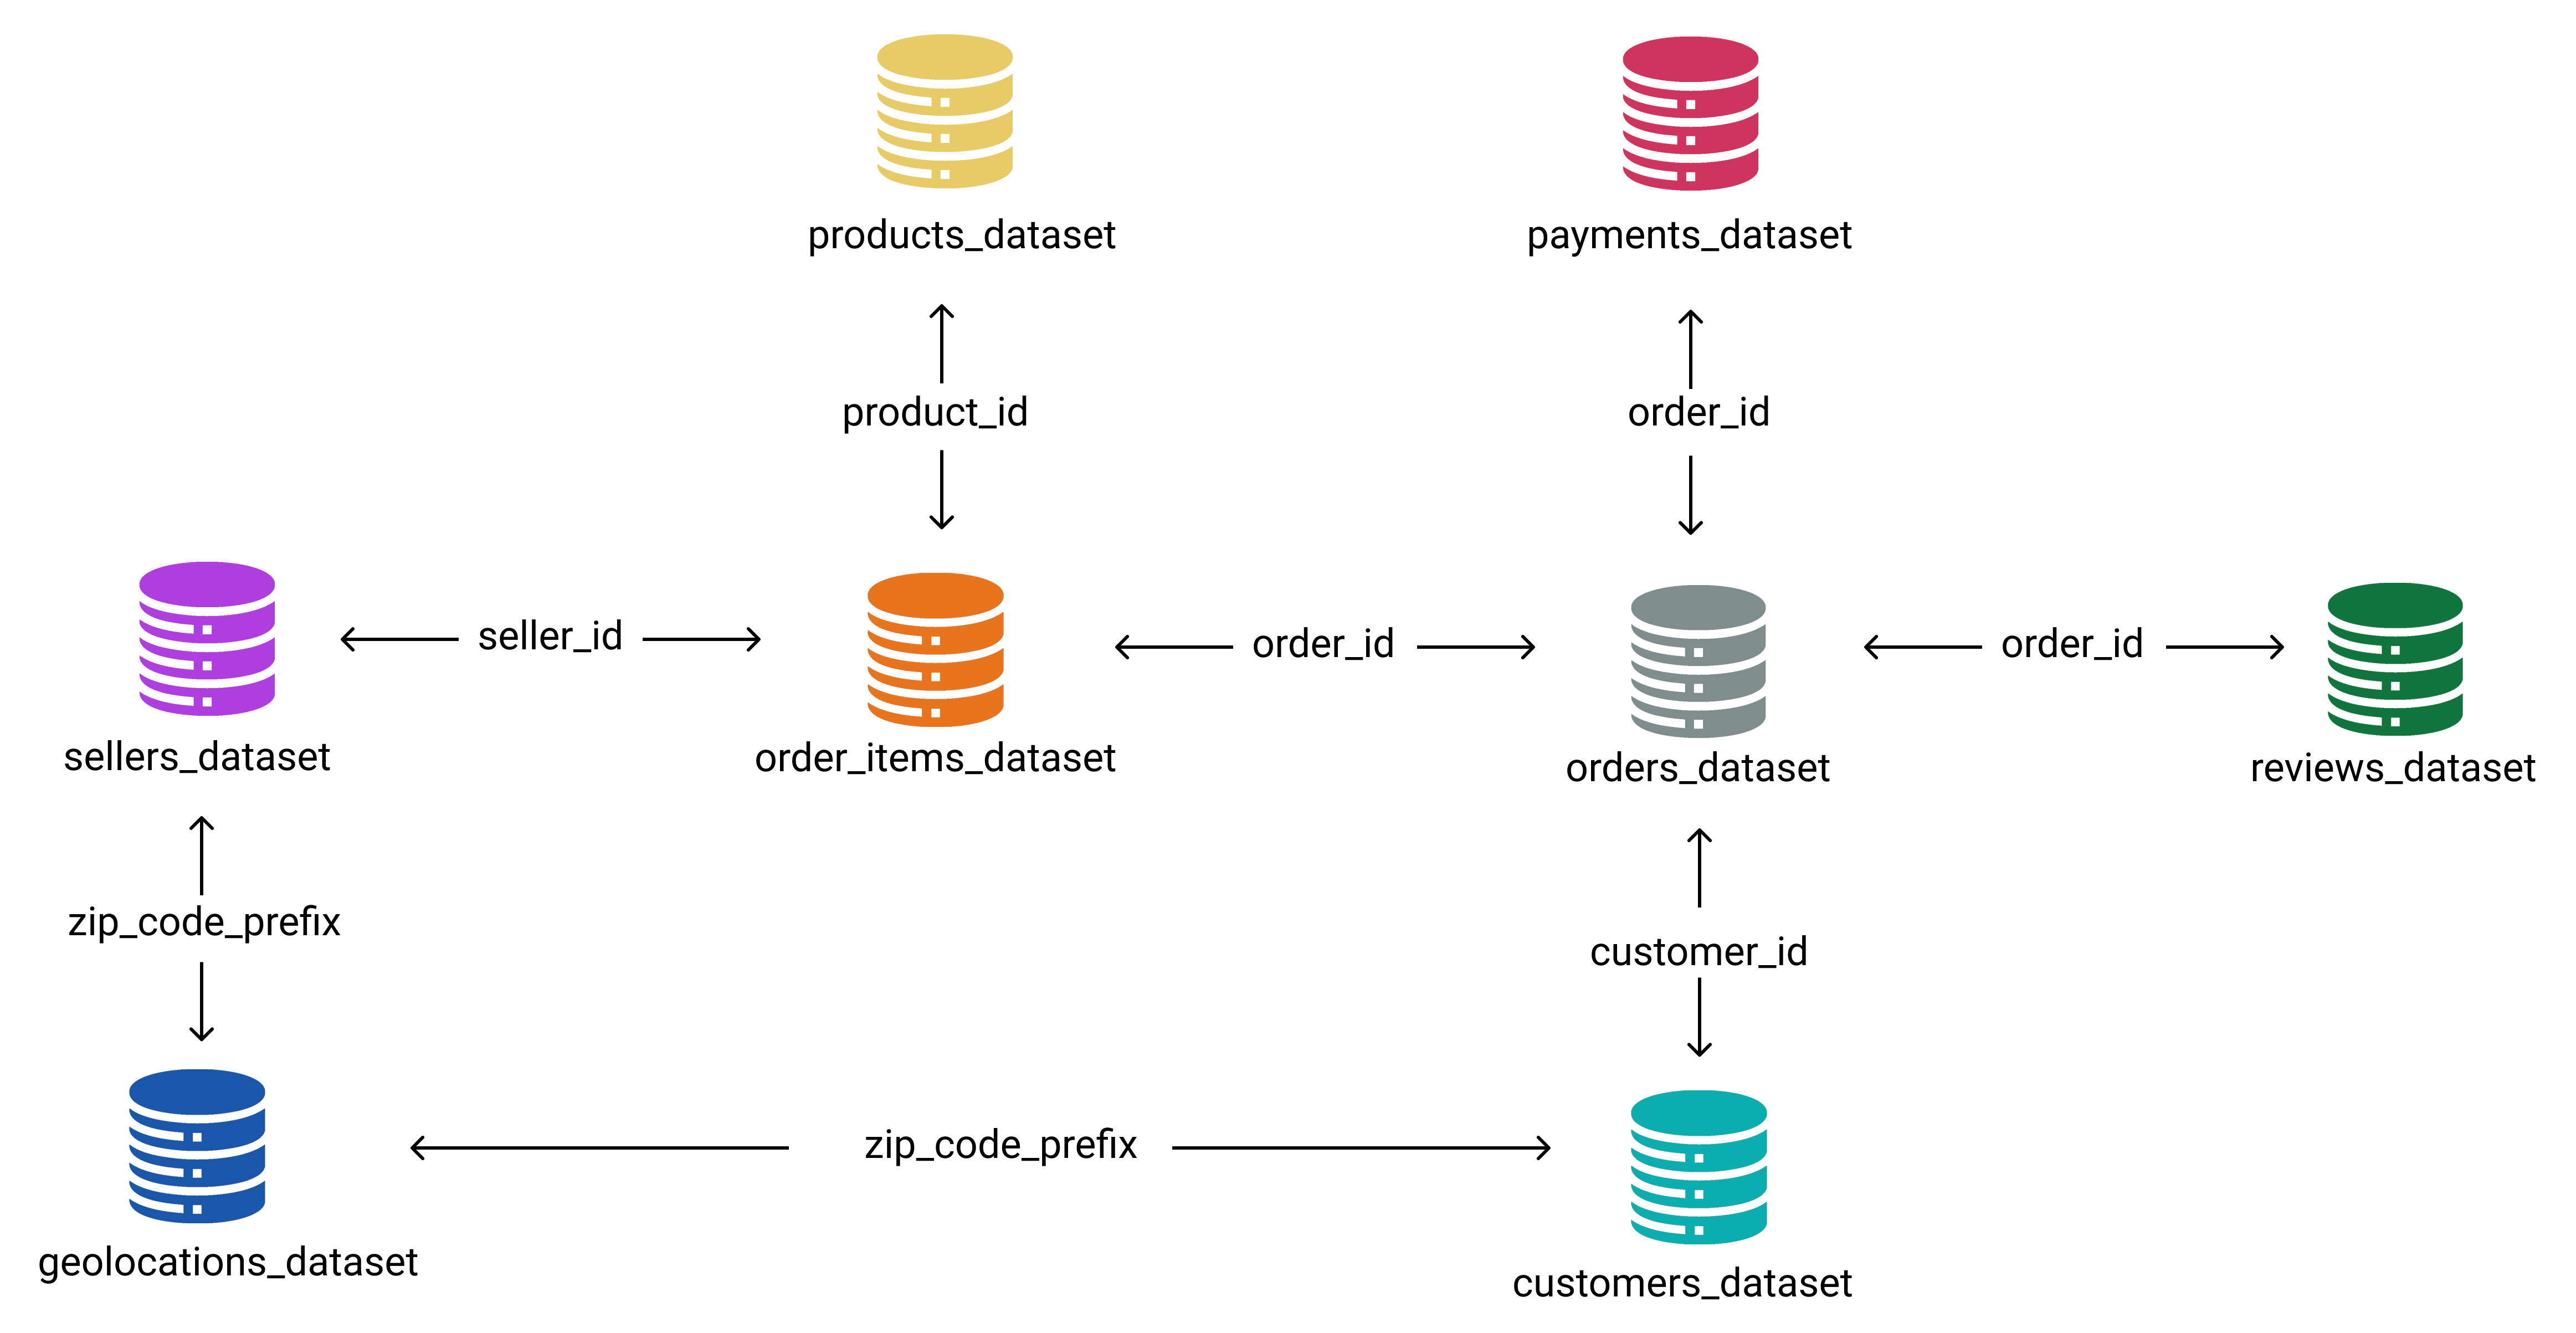

### Assessing Data

In [3]:
def show_info(df):
    return pd.DataFrame(
        {
            "Non-Null Count": df.count(),
            "Null Count": df.isna().sum(),
            "Duplicate": [df.duplicated(subset=i).sum() for i in df.columns],
            "Unique": df.nunique(),
            "Dtype": df.dtypes,
        }
    ).reset_index(names="Column")


def detailed_sum_duplicated(df, subset=None):
    n_dup = df.duplicated(subset=subset).sum()
    print(
        f"{n_dup} total duplicated entry based on {'all columns' if subset==None else ', '.join(subset)}"
    )

#### customers db

In [4]:
show_info(customer_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,customer_id,99441,0,0,99441,object
1,customer_unique_id,99441,0,3345,96096,object
2,customer_zip_code_prefix,99441,0,84447,14994,int64
3,customer_city,99441,0,95322,4119,object
4,customer_state,99441,0,99414,27,object


In [5]:
customer_db.describe()

,customer_zip_code_prefix
count,99441.00
mean,35137.47
std,29797.94
min,1003.00
25%,11347.00
50%,24416.00
75%,58900.00
max,99990.00


In [6]:
customer_db.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
61335,330082408728ef2455e41d8d17e0cca4,248404abab47fbd3122bb69e15760c87,18117,votorantim,SP
81402,5baf161a86ace9dd4f26c0183b4c99b5,f79b2ebd29ffe1d8d9b6f1dc7736ecdf,4855,sao paulo,SP
5597,693d02fe5397d7acda742a75d955610e,f9a3385a7764e9ff101e0187418fc131,14401,franca,SP
9730,e584f02d9cfc953ca2236a5fcebc2fb1,1cba83304eaba52a71d853f593d565f1,91370,porto alegre,RS
38610,0fc4dc350425b8337aa79c64ea30d617,042507632a640723b9060d4c617302e5,5794,sao paulo,SP
36807,f07e7c55e8f8f50b6847f8f6ff8ba7ef,c3c89619aad41124a5e9c38b27ab5b73,31840,belo horizonte,MG
33074,2172e7cb03b6ff992fba64349077a6f3,9141c8ae173873e1edc4c5ab7e2085ff,38270,campina verde,MG
14218,f97b46627a4e56ccc5f4026cdab2b60f,948376be8951123655e05035bf16d11e,36015,juiz de fora,MG
56881,91071294e01490e0b052deff9a5b0ab5,6e78e4c50eb9d01d0ff6aed4c2ada2d5,59145,parnamirim,RN
94156,3a054aa178999e64e016747463e87796,1760576731f518edcc21e95674f94273,37701,pocos de caldas,MG


**Insight:**
- Total 96096 pelanggan berasal dari 4119 kota yang berbeda, yang tersebar di 27 negara bagian
- Kolom customer_zip_code_prefix seharusnya memiliki nilai sebanyak 5 digit, namun terdapat beberapa nilai yang kurang dari 5 digit. Hal ini mungkin saja disebabkan oleh perubahan tipe data dari object/string menjadi integer

#### geolocation db

In [7]:
show_info(geolocation_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,geolocation_zip_code_prefix,1000163,0,981148,19015,int64
1,geolocation_lat,1000163,0,282803,717360,float64
2,geolocation_lng,1000163,0,282550,717613,float64
3,geolocation_city,1000163,0,992152,8011,object
4,geolocation_state,1000163,0,1000136,27,object


In [8]:
geolocation_db.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1000163.00,1000163.00,1000163.00
mean,36574.17,-21.18,-46.39
std,30549.34,5.72,4.27
min,1001.00,-36.61,-101.47
25%,11075.00,-23.60,-48.57
50%,26530.00,-22.92,-46.64
75%,63504.00,-19.98,-43.77
max,99990.00,45.07,121.11


In [9]:
detailed_sum_duplicated(
    geolocation_db,
    subset=[
        "geolocation_zip_code_prefix",
        "geolocation_lat",
        "geolocation_lng",
        "geolocation_state",
    ],
)

geolocation_db[
    geolocation_db.duplicated(
        subset=[
            "geolocation_zip_code_prefix",
            "geolocation_lat",
            "geolocation_lng",
            "geolocation_state",
        ],
    )
]["geolocation_city"].value_counts()

280007 total duplicated entry based on geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_state


geolocation_city
sao paulo           58572
rio de janeiro      26974
são paulo           10357
belo horizonte       8331
curitiba             5331
                    ...  
rio dos indios          1
campinas do sul         1
liberato salzano        1
tuparetama              1
inajá                   1
Name: count, Length: 5486, dtype: int64

**Insight:**
- Sama seperti pada tabel customer db, terjadi perubahan data pada kolom geolocation_zip_code_prefix
- Pada kolom kota, terdapat nilai unik yang lebih banyak dari tabel customer. Setelah diinspeksi lebih lanjut, ternyata terdapat kota yang memakai huruf brazil seperti são paulo dan riachão das neves

#### order items db

In [10]:
show_info(order_items_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,order_id,112650,0,13984,98666,object
1,order_item_id,112650,0,112629,21,int64
2,product_id,112650,0,79699,32951,object
3,seller_id,112650,0,109555,3095,object
4,shipping_limit_date,112650,0,19332,93318,object
5,price,112650,0,106682,5968,float64
6,freight_value,112650,0,105651,6999,float64


In [11]:
order_items_db.describe()

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


In [12]:
order_items_db[order_items_db["price"] > 1500]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
518,012f2c4ca09b101a73e18957c3294cd6,1,a9e9edb1bcac585bfbfa381ce40e5d99,06532f10282704ef4c69168b914b77be,2017-05-11 22:35:11,1820.00,81.62
873,02058d1c3b825765a4ec45968b8a1c97,1,d05d4a7430d1293367ba2ffbedcdef05,54065e9aef7e9e9c2dc23b7594db021a,2017-06-02 02:50:28,1799.00,27.34
1084,028558cddca332b40b4ac4cb77407edf,1,a233df9a388d27dbdfd31731d4236db0,784ba75dd9d20200c4caed3d7a77141a,2017-07-04 10:35:09,2649.99,134.17
1579,03a312126d4985217afef2625df60af4,1,16c4e87b98a9370a9cbc3a4658a3f45b,d23019c84ffae2d5ef2270367b8605fc,2018-04-17 17:50:18,1890.00,73.14
1607,03b31f549c27d03bed25fc42ddb46138,1,0433830caca22b01a0f477d31307b043,ba90964cff9b9e0e6f32b23b82465f7b,2018-06-14 10:30:51,1999.00,46.47
...,...,...,...,...,...,...,...
110819,fbc8e8d5591dc594ede3b88033625bd0,1,89ad4d91b311611f135ef67426267ffc,9b1585752613ec342d03bbab9997ec48,2018-08-24 19:09:48,1999.99,22.34
111719,fdca429f65581d898afc2df41740f716,1,cb460986a447ed00da792526bf6189e4,ea566164622c6b439516ab18062c42cd,2017-11-19 23:35:32,1599.00,24.94
111957,fe579bd413f722e51bc98182441e135c,1,4aa52adb5489aa151e17023d4e153297,f45122a9ab94eb4f3f8953578bc0c560,2017-05-17 17:10:13,1878.33,102.38
112026,fe8019fe8dd1f1af8ba5c0ffdb113a74,1,87feb07adc221a4c6cdf051ea1afd0ff,e882b2a25a10b9c057cc49695f222c19,2018-05-10 16:54:31,2110.00,43.35


**Insight:**
- Tidak terdapat data yang hilang
- Kolom order_item_id sebaiknya dalam bentuk object saja untuk memudahkan analisis
- Terdapat pemesanan yang memiliki harga yang terlalu mahal, perlu dilakukan analisis lebih lanjut untuk meninjau apakah ini merupakan kesalahan atau tidak

#### order payments db

In [13]:
show_info(order_payments_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,order_id,103886,0,4446,99440,object
1,payment_sequential,103886,0,103857,29,int64
2,payment_type,103886,0,103881,5,object
3,payment_installments,103886,0,103862,24,int64
4,payment_value,103886,0,74809,29077,float64


In [14]:
order_payments_db.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.00,103886,103886.00,103886.00
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.09,NaN,2.85,154.10
std,NaN,0.71,NaN,2.69,217.49
min,NaN,1.00,NaN,0.00,0.00
25%,NaN,1.00,NaN,1.00,56.79
50%,NaN,1.00,NaN,1.00,100.00
75%,NaN,1.00,NaN,4.00,171.84


In [15]:
order_payments_db[order_payments_db["payment_installments"] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [16]:
orders_db[
    (orders_db["order_id"] == "744bade1fcf9ff3f31d860ace076d422")
    | (orders_db["order_id"] == "1a57108394169c0b47d8f876acc9ba2d")
]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
63782,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16 00:00:00
66368,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00


In [17]:
order_payments_db[order_payments_db["payment_value"] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00


In [18]:
order_payments_db[order_payments_db["order_id"] == "8bcbe01d44d147f901cd3192671144db"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


**Insight:**
- Tidak terdapat data yang hilang
- Terdapat nilai transaksi yang bernilai 0 yang semua berasal dari metode pembayaran voucher. Hal ini mungkin saja terjadi ketika voucher sudah tidak memiliki saldo atau pembayaran sudah terbayar sepenuhnya saat voucher digunakan.
- Terdapat 5 metode pembayaran yang dipakai dan kartu kredit menjadi metode pembayaran paling banyak digunakan
- Terdapat 2 entry dengan installment_payment 0 yang mungkin saja dikarenakan kesalahan sistem. Jika dilihat pada tabel orders, pemesanan dengan id tersebut ada dan valid, nilai installment_payment akan diubah menjadi 1

#### order reviews db

In [19]:
show_info(order_reviews_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,review_id,99224,0,814,98410,object
1,order_id,99224,0,551,98673,object
2,review_score,99224,0,99219,5,int64
3,review_comment_title,11568,87656,94696,4527,object
4,review_comment_message,40977,58247,63064,36159,object
5,review_creation_date,99224,0,98588,636,object
6,review_answer_timestamp,99224,0,976,98248,object


In [20]:
order_reviews_db.describe()

,review_score
count,99224.00
mean,4.09
std,1.35
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


**Insight:**
- Dari skala 5, rating minimum pemesanan ada di angka 1 dan maksimum di angka 5 dengan rata-rata penilaian pemesanan ada di angka 4
- Tidak ada pesanan yang tidak mendapatkan penilaian rating

#### orders db

In [21]:
show_info(orders_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,order_id,99441,0,0,99441,object
1,customer_id,99441,0,0,99441,object
2,order_status,99441,0,99433,8,object
3,order_purchase_timestamp,99441,0,566,98875,object
4,order_approved_at,99281,160,8707,90733,object
5,order_delivered_carrier_date,97658,1783,18422,81018,object
6,order_delivered_customer_date,96476,2965,3776,95664,object
7,order_estimated_delivery_date,99441,0,98982,459,object


**Insight:**
- Setiap pelanggan hanya melakukan tepat sekali pemesanan
- kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date lebih baik diubah menjadi tipe data datetime untuk memudahkan analisa data

#### products db

In [22]:
show_info(products_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,product_id,32951,0,0,32951,object
1,product_category_name,32341,610,32877,73,object
2,product_name_lenght,32341,610,32884,66,float64
3,product_description_lenght,32341,610,29990,2960,float64
4,product_photos_qty,32341,610,32931,19,float64
5,product_weight_g,32949,2,30746,2204,float64
6,product_length_cm,32949,2,32851,99,float64
7,product_height_cm,32949,2,32848,102,float64
8,product_width_cm,32949,2,32855,95,float64


In [23]:
subset = [
    "product_category_name",
    "product_name_lenght",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "product_weight_g",
]
detailed_sum_duplicated(
    products_db,
    subset=subset,
)
products_db[
    products_db.duplicated(
        subset=subset,
    )
].sort_values(
    by="product_category_name"
).tail(5)

1986 total duplicated entry based on product_category_name, product_name_lenght, product_length_cm, product_height_cm, product_width_cm, product_weight_g


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31785,fbb1cfc2810efabf3235eccf4530f4ae,NaN,NaN,NaN,NaN,800.00,35.00,15.00,20.00
31997,0bb7d5c406dd6affef3cd4f5d6744844,NaN,NaN,NaN,NaN,200.00,16.00,2.00,11.00
32315,bb1c86c0b1cd8da99fbd48d798abcca0,NaN,NaN,NaN,NaN,830.00,19.00,6.00,26.00
32436,338f1838eb9cd29b59c9c2f4ee158f15,NaN,NaN,NaN,NaN,250.00,16.00,4.00,11.00
32476,d886830f276eaa72305b18639bc4cfce,NaN,NaN,NaN,NaN,1800.00,25.00,25.00,25.00


In [24]:
products_db[
    (products_db["product_weight_g"] == 200)
    & (products_db["product_length_cm"] == 16)
    & (products_db["product_height_cm"] == 2)
    & (products_db["product_width_cm"] == 11)
].sort_values(by="product_weight_g")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
132,acd427ee119d5c71c7a85ae488cb0a6a,fashion_bolsas_e_acessorios,52.00,68.00,7.00,200.00,16.00,2.00,11.00
194,5e21d5cab5d33e770d8150a4ee6117db,relogios_presentes,60.00,312.00,4.00,200.00,16.00,2.00,11.00
340,eca26be90d3b3454dd69a13a05bdb46e,fashion_bolsas_e_acessorios,59.00,119.00,3.00,200.00,16.00,2.00,11.00
359,457c5f8a59156ce6315753d8d788a16a,relogios_presentes,60.00,460.00,4.00,200.00,16.00,2.00,11.00
511,5d2754abdc85429bc7a4c37d52fbea43,fashion_bolsas_e_acessorios,53.00,770.00,1.00,200.00,16.00,2.00,11.00
...,...,...,...,...,...,...,...,...,...
32271,27e9b49fde45d10aeb0ec54968eff703,fashion_bolsas_e_acessorios,59.00,167.00,3.00,200.00,16.00,2.00,11.00
32276,a33100df83e04b43a9b42f973e3a429a,relogios_presentes,60.00,692.00,3.00,200.00,16.00,2.00,11.00
32498,45f134f05fdbccafa57f9f5b22f70b62,beleza_saude,43.00,948.00,1.00,200.00,16.00,2.00,11.00
32595,4bc67f0e0c4badffd66ddb6641122a33,relogios_presentes,59.00,179.00,2.00,200.00,16.00,2.00,11.00


In [25]:
products_db.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.00,32341.00,32341.00,32949.00,32949.00,32949.00,32949.00
mean,48.48,771.50,2.19,2276.47,30.82,16.94,23.20
std,10.25,635.12,1.74,4282.04,16.91,13.64,12.08
min,5.00,4.00,1.00,0.00,7.00,2.00,6.00
25%,42.00,339.00,1.00,300.00,18.00,8.00,15.00
50%,51.00,595.00,1.00,700.00,25.00,13.00,20.00
75%,57.00,972.00,3.00,1900.00,38.00,21.00,30.00
max,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


In [26]:
products_db[products_db["product_weight_g"] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.00,529.00,1.00,0.00,30.00,25.00,30.00
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.00,528.00,1.00,0.00,30.00,25.00,30.00
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.00,528.00,1.00,0.00,30.00,25.00,30.00
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.00,528.00,1.00,0.00,30.00,25.00,30.00


In [27]:
products_db[
    (products_db["product_length_cm"] == 30.00)
    & (products_db["product_height_cm"] == 25.00)
    & (products_db["product_width_cm"] == 30.00)
    & (products_db["product_category_name"] == "cama_mesa_banho")
]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1731,500909059ad72b36b2554150cc327edb,cama_mesa_banho,39.00,1140.00,1.00,3100.00,30.00,25.00,30.00
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.00,529.00,1.00,0.00,30.00,25.00,30.00
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.00,528.00,1.00,0.00,30.00,25.00,30.00
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.00,528.00,1.00,0.00,30.00,25.00,30.00
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.00,528.00,1.00,0.00,30.00,25.00,30.00


**Insight:**
- Terdapat 32951 produk yang berbeda
- Sebanyak 610 product tidak memiliki detail produk. Produk dengan detail seperti berat, panjang, lebar, dan tinggi yang sama belum tentu merupakan barang yang sama. Demikian juga dengan nama produk dan kategori yang sama belum tentu memiliki detail produk yang sama pula
- Terdapat 4 produk dengan kategori cama_mesa_banho, yang memiliki berat 0

#### sellers db

In [28]:
show_info(sellers_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,seller_id,3095,0,0,3095,object
1,seller_zip_code_prefix,3095,0,849,2246,int64
2,seller_city,3095,0,2484,611,object
3,seller_state,3095,0,3072,23,object


In [29]:
sellers_db.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.00,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.06,NaN,NaN
std,NaN,32713.45,NaN,NaN
min,NaN,1001.00,NaN,NaN
25%,NaN,7093.50,NaN,NaN
50%,NaN,14940.00,NaN,NaN
75%,NaN,64552.50,NaN,NaN


**Insight:**
- 3095 penjual berasal dari 611 kota yang tersebar di 23 negara bagian yang berbeda
- Sama dengan tabel sebelumnya, kolom prefix kode pos dan kota perlu dilakukan pembenahan

#### product category name translation db

In [30]:
show_info(products_translation_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,product_category_name,71,0,0,71,object
1,product_category_name_english,71,0,0,71,object


In [31]:
print("Nama produk yang tidak tertera:")

for p in products_db["product_category_name"].unique():
    if p not in products_translation_db["product_category_name"].unique():
        print(p)

Nama produk yang tidak tertera:
nan
pc_gamer
portateis_cozinha_e_preparadores_de_alimentos


**Insight:**
- Total hanya ada 71/73 kategori terjemahan inggris

### Cleaning Data

In [32]:
def fix_prefix(data):
    return data.astype(str).str.zfill(5)


def fix_city(data):
    replacements = str.maketrans(
        {
            "ã": "a",
            "â": "a",
            "á": "a",
            "ê": "e",
            "é": "e",
            "í": "i",
            "õ": "o",
            "ô": "o",
            "ó": "o",
            "ú": "u",
            "ç": "c",
            "ü": "u",
            "Ã": "A",
            "Â": "A",
            "Á": "A",
            "Ê": "E",
            "É": "E",
            "Í": "I",
            "Õ": "O",
            "Ô": "O",
            "Ó": "O",
            "Ú": "U",
            "Ç": "C",
            "Ü": "U",
        }
    )
    return data.str.translate(replacements)


# mengubah prefix kode pos menjadi 5 digit
customer_db["customer_zip_code_prefix"] = fix_prefix(
    customer_db["customer_zip_code_prefix"]
)
geolocation_db["geolocation_zip_code_prefix"] = fix_prefix(
    geolocation_db["geolocation_zip_code_prefix"]
)
sellers_db["seller_zip_code_prefix"] = fix_prefix(sellers_db["seller_zip_code_prefix"])


# mengubah nilai payment_installemts dari 0 menjadi 1
order_payments_db.loc[
    order_payments_db["payment_installments"] == 0, "payment_installments"
] = 1


# mengubah nilai product_weight_g dari 0 menjadi nan
products_db.loc[products_db["product_weight_g"] == 0, "product_weight_g"] = np.nan


# mengubah penamaan kota memakai huruf internasional
customer_db["customer_city"] = fix_city(customer_db["customer_city"])
geolocation_db["geolocation_city"] = fix_city(geolocation_db["geolocation_city"])


# mengatasi nilai yang hilang
products_db.fillna({"product_category_name": "unknown"}, inplace=True)


# mengubah tipe data
order_items_db["order_item_id"] = order_items_db["order_item_id"].astype(str)
date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
for column in date_columns:
    orders_db[column] = pd.to_datetime(orders_db[column], errors="coerce")

## Exploratory Data Analysis (EDA)

### Explore Customers

In [33]:
show_info(customer_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,customer_id,99441,0,0,99441,object
1,customer_unique_id,99441,0,3345,96096,object
2,customer_zip_code_prefix,99441,0,84447,14994,object
3,customer_city,99441,0,95322,4119,object
4,customer_state,99441,0,99414,27,object


In [34]:
customer_db.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


**Insight:**
- Dari total 96096 customer, 15% berasal dari kota Sao Paulo

### Explore Products

In [35]:
# menggabungkan product dengan product translation

english_product = products_db.merge(
    products_translation_db, on="product_category_name", how="left"
)

In [36]:
show_info(english_product)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,product_id,32951,0,0,32951,object
1,product_category_name,32951,0,32877,74,object
2,product_name_lenght,32341,610,32884,66,float64
3,product_description_lenght,32341,610,29990,2960,float64
4,product_photos_qty,32341,610,32931,19,float64
5,product_weight_g,32945,6,30747,2203,float64
6,product_length_cm,32949,2,32851,99,float64
7,product_height_cm,32949,2,32848,102,float64
8,product_width_cm,32949,2,32855,95,float64
9,product_category_name_english,32328,623,32879,71,object


In [37]:
english_product.describe(include="object")

,product_id,product_category_name,product_category_name_english
count,32951,32951,32328
unique,32951,74,71
top,106392145fca363410d287a815be6de4,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [38]:
english_product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.00,32341.00,32341.00,32945.00,32949.00,32949.00,32949.00
mean,48.48,771.50,2.19,2276.75,30.82,16.94,23.20
std,10.25,635.12,1.74,4282.23,16.91,13.64,12.08
min,5.00,4.00,1.00,2.00,7.00,2.00,6.00
25%,42.00,339.00,1.00,300.00,18.00,8.00,15.00
50%,51.00,595.00,1.00,700.00,25.00,13.00,20.00
75%,57.00,972.00,3.00,1900.00,38.00,21.00,30.00
max,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


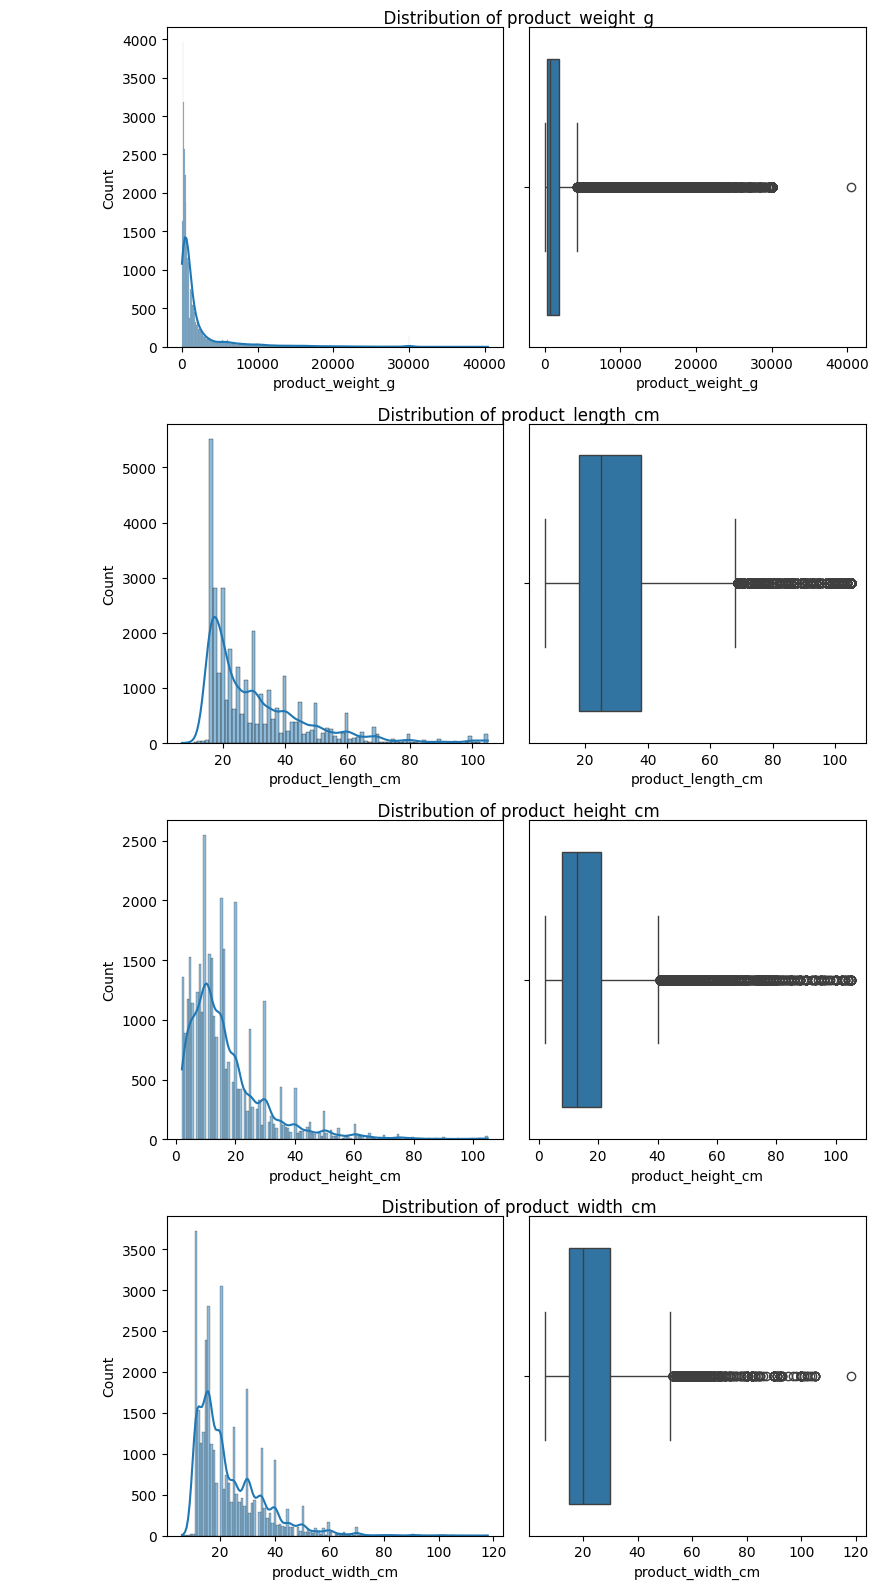

In [39]:
prod_detail_cols = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

i = 1
plt.figure(figsize=(8, 4 * len(prod_detail_cols)))
for col in prod_detail_cols:
    plt.subplot(len(prod_detail_cols), 2, i)
    sns.histplot(english_product, x=col, kde=True)
    plt.title(" " * 70 + f"Distribution of {col}", pad=1)
    i += 1
    plt.subplot(len(prod_detail_cols), 2, i)
    sns.boxplot(english_product, x=col)
    i += 1
plt.tight_layout()

**Insight:**
- Produk terbanyak terdapat pada kategori bed_bath_table sebanyak ±9% dari total produk.
- Rata-rata produk hanya menyertakan 1 foto saja, namun ada yang menyertakan hingga 20 foto
- Produk yang tersedia sangat beragam dengan spesifikasi:
  - berat: 2 g - 40.43 kg
  - panjang: 7 cm - 105 cm
  - tinggi: 2 cm - 105 cm
  - lebar: 6 cm - 118 cm

### Explore Sellers

In [40]:
show_info(sellers_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,seller_id,3095,0,0,3095,object
1,seller_zip_code_prefix,3095,0,849,2246,object
2,seller_city,3095,0,2484,611,object
3,seller_state,3095,0,3072,23,object


In [41]:
sellers_db.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,9e25199f6ef7e7c347120ff175652c3b,14940,sao paulo,SP
freq,1,49,694,1849


**Insight:**
- Dari total 3095 seller, 22% berasal dari kota Sao Paulo. Hal ini mungkin menunjukkan bahwa kota Sao Paulo menjadi kota perdagangan

### Explore Orders

In [42]:
show_info(orders_db)

,Column,Non-Null Count,Null Count,Duplicate,Unique,Dtype
0,order_id,99441,0,0,99441,object
1,customer_id,99441,0,0,99441,object
2,order_status,99441,0,99433,8,object
3,order_purchase_timestamp,99441,0,566,98875,datetime64[ns]
4,order_approved_at,99281,160,8707,90733,datetime64[ns]
5,order_delivered_carrier_date,97658,1783,18422,81018,datetime64[ns]
6,order_delivered_customer_date,96476,2965,3776,95664,datetime64[ns]
7,order_estimated_delivery_date,99441,0,98982,459,datetime64[ns]


In [43]:
orders_db.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight:**
- 97% pemesanan telah sampai
- Data pemesanan yang tercatat mulai dari tahun 2016 - 2018

### Explore Order_Items & Orders

In [44]:
orders_db[~orders_db["order_id"].isin(order_items_db["order_id"])].shape[0]

775

In [45]:
[
    status
    for status in orders_db["order_status"].unique()
    if status
    not in orders_db[~orders_db["order_id"].isin(order_items_db["order_id"])][
        "order_status"
    ].unique()
]

['delivered', 'processing', 'approved']

In [46]:
[
    status
    for status in orders_db["order_status"].unique()
    if status
    not in orders_db[orders_db["order_id"].isin(order_items_db["order_id"])][
        "order_status"
    ].unique()
]

['created']

**Insight:**
- Terdapat 775 pesanan yang tidak tercatat di tabel order_items dan keseluruhannya tidak ada satupun yang memiliki status 'delivered', 'processing' ataupun 'approved'
- Sebaliknya, tidak ada pesanan yang masih berstatus 'created' yang ada di tabel order_items

### Explore Order_Items & Sellers

In [47]:
sellers_db[~sellers_db["seller_id"].isin(order_items_db["seller_id"])].shape[0]

0

**Insight:**
- Semua pesanan dari sellers tercatat pada tabel order_items

### Explore Order_Items & Products

In [48]:
products_db[~products_db["product_id"].isin(order_items_db["product_id"])].shape[0]

0

**Insight:**
- Semua produk yang tedapat pada tabel products tercatat pada tabel order_items 

### Explore Orders & Payments

In [49]:
orders_db[~orders_db["order_id"].isin(order_payments_db["order_id"])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04


In [50]:
order_items_db[~order_items_db["order_id"].isin(order_payments_db["order_id"])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


**Insight:**
- Terdapat 1 pesanan yang tidak ada data transaksinya dengan `order_id = bfbd0f9bdef84302105ad712db648a6c` yang mana pesanan tersebut terdiri dari 3 item

### Explore Orders & Reviews

In [51]:
orders_db[~orders_db["order_id"].isin(order_reviews_db["order_id"])].shape[0]

768

In [52]:
order_items_db[~order_items_db["order_id"].isin(order_reviews_db["order_id"])].shape[0]

942

**Insight:**
- Terdapat 768 pesanan dengan total 942 produk yang tidak mendapat penilaian

**Final Insight:**
- `orders_db` mengandung data order `(order_id)` yang customer `(customer_id)` buat
- `order_items_db` mengandung detail tentang item `(order_item_id)` apa saja yang dipesan untuk setiap order `(order_id)`. setiap order `(order_id)` memiliki detail produk nya masing-masing `(product_id)`, dan penjual terkait `(seller_id)`
- hubungan `orders_db` dengan `order_items_db` adalah one-to-many. terdapat 775 data order pada `orders_db` yang tidak ada pada `order_items_db`
- `sellers_db` mengandung detail tentang tiap seller `(seller_id)`
- hubungan `sellers_db` dengan `order_items_db` adalah one-to-many. semua seller `(seller_id)` pada `order_items_db` ada pada `sellers_db`
- `products_db` mengandung detail tentang tiap product `(product_id)`
- hubungan `products_db` dengan `order_items_db` adalah one-to-many. semua product `(product_id)` pada `order_items_db` ada pada `products_db`
- `products_translation_db` mengandung translasi bahasa inggris dari product_categories, terdapat 2 product_categories pada `products_db` yang tidak ada pada `products_translation_db`
- `reviews_db` mengandung review `(reviews_id)` untuk setiap order `(order_id)` terkait pada `orders_db`
- hubungan `reviews_db` dengan `orders_db` adalah many-to-one. terdapat 759 data pada `order_items_db` yang tidak ada pada `reviews_db`
- `order_payments_db` mengandung detail tentang payment `(payment_id)` untuk setiap order `(order_id)` pada `orders_db`
- hubungan `order_payments_db` dengan `orders_db` adalah many_to_one. terdapat 1 order `(order_id)` pada `orders_db` yang tidak ada pada `order_payments_db` dan order (order_id) ini memiliki 3 data pada `order_items_db`
- `customers_db` mengandung detail untuk setiap `customer_id`. `customer_id` adalah sebuah id untuk menandai setiap aksi order yang dilakukan oleh customer `(customer_unique_id)` terkait. setiap customer `(customer_unique_id)` boleh jadi memiliki beberapa `customer_id` sehingga memiliki beberapa order `(order_id)`.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk yang menjadi top-selling?

In [53]:
custom_blue_palette = [
    "#003D80",
    "#0056B3",
    "#007BFF",
    "#3399FF",
    "#66B2FF",
]

In [54]:
def transform_order_payment(df):
    payment_types = df["payment_type"].unique()
    temp_df = df.copy()
    for c in payment_types:
        temp_df[f"{c}"] = df["payment_type"].apply(lambda x: 1 if x == c else 0)

    agg_columns = {
        "total_payment_value": ("payment_value", "sum"),
    }
    for _, value in enumerate(payment_types):
        agg_columns[f"{value}_payment_used"] = (value, "sum")

    return temp_df.groupby("order_id").agg(**agg_columns)


def transform_order_reviews(df):
    temp_df = df.groupby("order_id").agg(
        total_reviews=("review_id", "nunique"),
        total_rating_score=("review_score", "sum"),
    )
    temp_df["average_rating"] = temp_df["total_rating_score"] / temp_df["total_reviews"]
    return temp_df


sales_data = (
    order_items_db.merge(products_db, on="product_id")
    .merge(products_translation_db, on="product_category_name", how="left")
    .merge(sellers_db, on="seller_id")
    .merge(orders_db, on="order_id")
    .merge(transform_order_reviews(order_reviews_db), on="order_id")
    .merge(
        transform_order_payment(order_payments_db),
        on="order_id",
    )
    .merge(customer_db, on="customer_id")
)
sales_data["total_revenue"] = sales_data["price"] + sales_data["freight_value"]
sales_data.fillna(
    {"product_category_name_english": sales_data["product_category_name"]}, inplace=True
)
sales_data["order_purchase_year"] = sales_data["order_purchase_timestamp"].dt.year

sales_data.to_csv("dashboard/main_data.csv", index=None)

sales_data.query("order_status == 'delivered'", inplace=True)


top_categories = (
    (
        sales_data.groupby("product_category_name_english").agg(
            total_revenue=("total_revenue", "sum"),
        )
    )
    .sort_values(by="total_revenue", ascending=False)
    .reset_index()
)

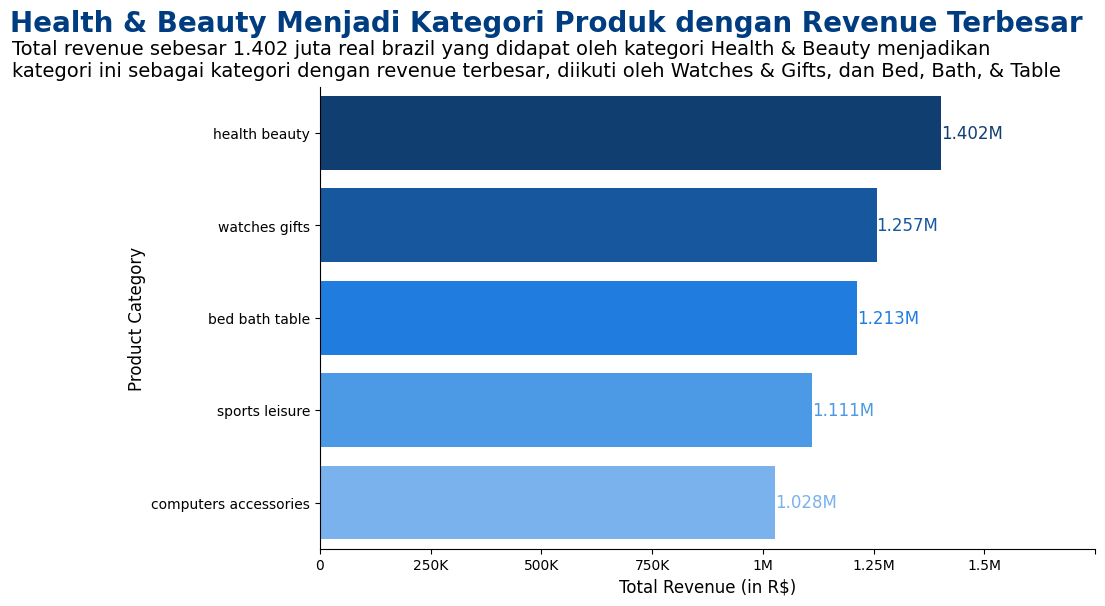

In [55]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x="total_revenue",
    y="product_category_name_english",
    data=top_categories.head(5),
    palette=custom_blue_palette,
    hue="product_category_name_english",
)

plt.title(
    "Health & Beauty Menjadi Kategori Produk dengan Revenue Terbesar",
    size=20,
    x=-0.4,
    pad=40,
    weight="bold",
    ha="left",
    color="#003D80",
)

plt.suptitle(
    t="Total revenue sebesar 1.402 juta real brazil yang didapat oleh kategori Health & Beauty menjadikan\nkategori ini sebagai kategori dengan revenue terbesar, diikuti oleh Watches & Gifts, dan Bed, Bath, & Table",
    x=-0.183,
    y=0.96,
    size=14,
    ha="left",
    va="top",
)


plt.xlabel("Total Revenue (in R$)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
sns.despine(right=True)

plt.yticks(
    [0, 1, 2, 3, 4],
    labels=[
        i.replace("_", " ")
        for i in top_categories["product_category_name_english"].head(5)
    ],
)

plt.xticks(
    [
        0,
        250_000,
        500_000,
        750_000,
        1_000_000,
        1_250_000,
        1_500_000,
        1_750_000,
    ],
    labels=[
        0,
        "250K",
        "500K",
        "750K",
        "1M",
        "1.25M",
        "1.5M",
        "",
    ],
)

for index, (value, bar) in enumerate(
    zip(top_categories["total_revenue"], bar_plot.patches)
):
    bar_color = bar.get_facecolor()
    plt.text(
        value,
        index,
        f"{value / 1_000_000:.3f}M",
        va="center",
        ha="left",
        color=bar_color,
        fontsize=12,
    )

plt.show()

### Pertanyaan 2: Negara bagian mana saja yang menjadi top-selling?

In [56]:
top_states = (
    (
        sales_data.groupby("customer_state").agg(
            total_revenue=("total_revenue", "sum"),
        )
    )
    .sort_values(by="total_revenue", ascending=False)
    .reset_index()
)

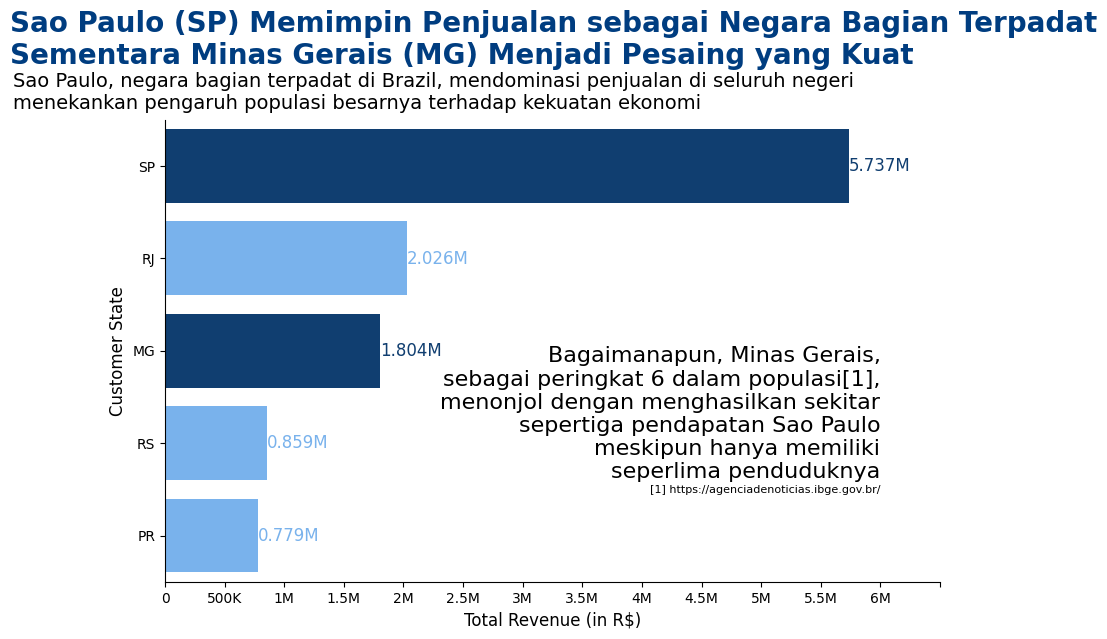

In [57]:
custom_colors = ["#003D80", "#66B2FF", "#003D80", "#66B2FF", "#66B2FF"]

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x="total_revenue",
    y="customer_state",
    data=top_states.head(5),
    palette=custom_colors,
    hue="customer_state",
)

plt.title(
    "Sao Paulo (SP) Memimpin Penjualan sebagai Negara Bagian Terpadat\nSementara Minas Gerais (MG) Menjadi Pesaing yang Kuat",
    size=20,
    x=-0.2,
    pad=40,
    weight="bold",
    ha="left",
    color="#003D80",
)

plt.suptitle(
    t="Sao Paulo, negara bagian terpadat di Brazil, mendominasi penjualan di seluruh negeri\nmenekankan pengaruh populasi besarnya terhadap kekuatan ekonomi",
    x=-0.027,
    y=0.96,
    size=14,
    ha="left",
    va="top",
)

plt.text(
    s="Bagaimanapun, Minas Gerais,\nsebagai peringkat 6 dalam populasi[1],\nmenonjol dengan menghasilkan sekitar\nsepertiga pendapatan Sao Paulo\nmeskipun hanya memiliki\nseperlima penduduknya",
    x=6_000_000,
    y=1.95,
    size=16,
    ha="right",
    va="top",
)
plt.text(
    s="[1] https://agenciadenoticias.ibge.gov.br/",
    x=6_000_000,
    y=3.45,
    size=8,
    ha="right",
    va="top",
)


plt.xlabel("Total Revenue (in R$)", fontsize=12)
plt.ylabel("Customer State", fontsize=12)
sns.despine(right=True)

plt.yticks(
    [0, 1, 2, 3, 4],
    labels=[i.replace("_", " ") for i in top_states["customer_state"].head(5)],
)

plt.xticks(
    [
        0,
        500_000,
        1_000_000,
        1_500_000,
        2_000_000,
        2_500_000,
        3_000_000,
        3_500_000,
        4_000_000,
        4_500_000,
        5_000_000,
        5_500_000,
        6_000_000,
        6_500_000,
    ],
    labels=[
        0,
        "500K",
        "1M",
        "1.5M",
        "2M",
        "2.5M",
        "3M",
        "3.5M",
        "4M",
        "4.5M",
        "5M",
        "5.5M",
        "6M",
        "",
    ],
)

for index, (value, bar) in enumerate(
    zip(top_states["total_revenue"], bar_plot.patches)
):
    bar_color = bar.get_facecolor()
    plt.text(
        value,
        index,
        f"{value / 1_000_000:.3f}M",
        va="center",
        ha="left",
        color=bar_color,
        fontsize=12,
    )

plt.show()

[source](https://agenciadenoticias.ibge.gov.br/en/agencia-press-room/2185-news-agency/releases-en/22385-ibge-releases-population-estimates-of-municipalities-for-2018)

## Analisis Lanjutan (Opsional)

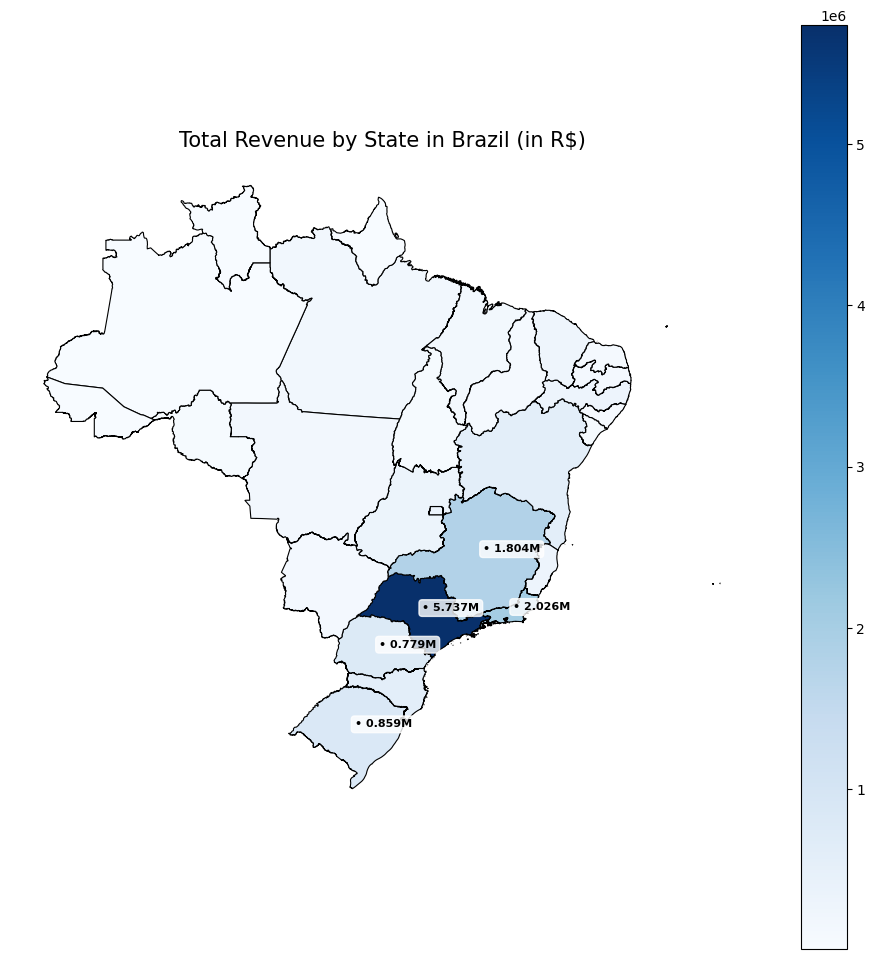

In [58]:
brazil = read_state(year=2018)

brazil_data = brazil.merge(
    top_states, left_on="abbrev_state", right_on="customer_state", how="left"
).sort_values(by="total_revenue", ascending=False)

fig, ax = plt.subplots(figsize=(12, 12))

brazil_data.plot(
    column="total_revenue",
    cmap="Blues",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
)
props = dict(boxstyle="round", facecolor="white", edgecolor="white", alpha=0.8)
for idx, row in brazil_data.head(5).iterrows():
    plt.annotate(
        text=f"• {row['total_revenue'] / 1_000_000:.3f}M",
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="left",
        fontsize=8,
        color="black",
        bbox=props,
        weight="bold",
    )
ax.set_axis_off()
plt.title("Total Revenue by State in Brazil (in R$)", fontsize=15)

plt.show()

## Conclusion

- Conclusion pertanyaan 1: Apa saja kategori produk yang menjadi top-selling?
  - Kategori Health & Beauty merupakan kategori produk terlaris, menghasilkan pendapatan tertinggi sebesar 1,402 juta R$
  - Diikuti oleh Watches & Gifts dengan 1,257 juta R$, dan Bed, Bath & Table dengan 1,213 juta R$
  - Kategori lain yang menghasilkan pendapatan tinggi adalah Sports & Leisure dan Computers & Accessories, keduanya menghasilkan lebih dari 1 juta R$
- Conclusion pertanyaan 2: Negara bagian mana saja yang menjadi top-selling?
  - Sao Paulo (SP) adalah negara bagian dengan penjualan tertinggi dengan selisih yang besar, dengan total pendapatan sebesar 5,737 juta R$. Pendapatan yang tinggi ini kemungkinan dipengaruhi oleh populasi besar dan keunggulan ekonomi Sao Paulo
  - Rio de Janeiro (RJ) adalah yang tertinggi kedua, dengan 2,026 juta R$, diikuti oleh Minas Gerais (MG) dengan 1,804 juta R$.
  - Negara bagian lain dengan pendapatan yang menonjol termasuk Rio Grande do Sul (RS) dengan 0,859 juta R$ dan Parana (PR) dengan 0,779 juta R$.